<a href="https://colab.research.google.com/github/gideononyewuenyi/Time-Series-Forecasting-2/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting using statistical modeling and machine learning

## Problem statement

Air pollution has been a major problem faced in Nigeria especially in the southern part of the country that’s plagued with soot resulting from illegal refining of crude oil, flaring of gases, and uncontrolled emission from automobiles. (https://qz.com/africa/912374/nigerian-city-of-port-harcourt-is-dealing-with-with-a-mystery-soot-air-pollution-panic/)
(https://twitter.com/FMEnvng/status/831561428414763009)


## What is my goal?

Our goal is to be able to predict the amount of air pollution (PM 2.5) over a period of time 
* (To determine air quality in an area, pollutant concentrations are physically measured and reported. The AQI is calculated based on the average concentration of a particular pollutant measured over a standard time interval (24 hours for most pollutants, 8 hours for carbon monoxide and ozone), you can learn more here:
https://fit.thequint.com/health-news/explaining-air-quality-index#read-more  
https://cpcb.nic.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvQWJvdXRfQVFJLnBkZg== )


#### **Time Series** is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

#### It can help us to understand past behaviour and predict the future

## Import some relevant packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from IPython.display import display, HTML, display_html
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read in my data

In this notebook, we will be using a dataset of air quality obtained from the Purpleair sensor in Port Harcourt, Nigeria

In [ ]:
#url = "https://raw.githubusercontent.com/gideononyewuenyi/Exploratory-analysis/main/Lekki%20Phase%201%20(outside)%20(6.451397%203.471201)%20Primary%2030_minute_average%2012_17_2019%206_6_2021.csv"
#df = pd.read_csv (url)
url = "https://raw.githubusercontent.com/gideononyewuenyi/Time-Series-Forecasting/main/Port%20Harcourt%2C%20Nigeria%20(outside)%20(4.80678%207.002953)%20Primary%20Real%20Time%2007_27_2021%2008_03_2021.csv"
df = pd.read_csv (url)

## Take a look at my data
- How many rows and columns are in the dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? 


In [ ]:
# look at data
display(df.head())

# look a shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2021-07-27 00:00:05 UTC,413,105.25,189.56,230.30,436.0,-53.0,82.0,63.0,125.72,NaN
1,2021-07-27 00:02:06 UTC,414,113.47,202.76,239.84,438.0,-53.0,82.0,63.0,134.43,NaN
2,2021-07-27 00:04:05 UTC,415,119.02,217.44,259.56,440.0,-53.0,82.0,63.0,144.21,NaN
3,2021-07-27 00:06:05 UTC,416,126.20,226.43,273.25,442.0,-53.0,82.0,63.0,150.29,NaN
4,2021-07-27 00:08:06 UTC,417,131.48,243.86,291.41,444.0,-53.0,82.0,63.0,161.82,NaN


(5461, 11)

created_at           object
entry_id              int64
PM1.0_CF1_ug/m3     float64
PM2.5_CF1_ug/m3     float64
PM10.0_CF1_ug/m3    float64
dtype: object

created_at          False
entry_id            False
PM1.0_CF1_ug/m3     False
PM2.5_CF1_ug/m3     False
PM10.0_CF1_ug/m3    False
dtype: bool

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
count,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,0.0
mean,3143.000000,51.636479,86.137370,98.152769,2203.266068,-54.600073,86.659037,58.997803,62.215981,NaN
std,1576.599241,37.636242,70.356467,84.158415,2081.296338,3.755888,4.230171,8.929126,43.867013,NaN
min,413.000000,16.980000,27.860000,29.730000,1.000000,-69.000000,78.000000,29.000000,27.820000,NaN
25%,1778.000000,27.300000,43.050000,47.620000,442.000000,-57.000000,84.000000,55.000000,37.480000,NaN
50%,3143.000000,35.940000,56.160000,61.980000,1199.000000,-54.000000,85.000000,62.000000,43.890000,NaN
75%,4508.000000,59.180000,96.820000,109.600000,3944.000000,-52.000000,89.000000,66.000000,63.860000,NaN
85%,5054.000000,87.050000,146.020000,168.020000,5037.000000,-51.000000,91.000000,67.000000,96.630000,NaN
95%,5600.000000,137.500000,244.590000,286.980000,6135.000000,-49.000000,95.000000,68.000000,162.360000,NaN
99%,5818.400000,184.694000,349.200000,420.442000,6571.800000,-48.000000,100.000000,70.000000,232.020000,NaN


## Processing my data

In [ ]:
# Rename columns
df = df.rename(columns = {'created_at': 'dt', 'PM2.5_ATM_ug/m3': 'pm'})


# Change index to datetime
df['dt'].index = pd.to_datetime(df.index)

# Sort the values
df = df.sort_index(ascending = True)

# Fill values with forward fill
df = df.fillna(method='ffill')

# Show the end of the data
display(df.tail())

,dt,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,pm,Unnamed: 10
5456,2021-08-03 23:50:18 UTC,5869,125.58,222.44,259.49,704.0,-48.0,84.0,69.0,147.46,NaN
5457,2021-08-03 23:52:17 UTC,5870,120.38,213.91,249.43,706.0,-49.0,84.0,69.0,141.89,NaN
5458,2021-08-03 23:54:17 UTC,5871,118.11,215.66,251.62,708.0,-48.0,84.0,69.0,142.98,NaN
5459,2021-08-03 23:56:18 UTC,5872,113.34,201.43,238.93,710.0,-49.0,84.0,69.0,133.55,NaN
5460,2021-08-03 23:58:17 UTC,5873,106.44,190.41,222.87,712.0,-48.0,84.0,69.0,126.20,NaN


## Plot my data
* Is there an overall increasing trend? (movement of a series to relatively higher or lower values over a long period of time)
- Are there some differences in the variance over time? (increased amplitudes during the course of the time period observed)
- There may be some seasonality (i.e., cycles) in the data. (cycles that repeat regularly over time)

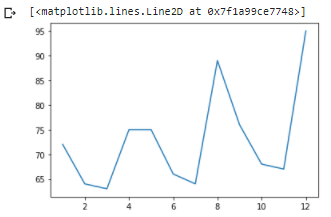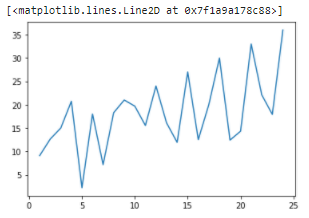

Text(0, 0.5, 'PM2.5')

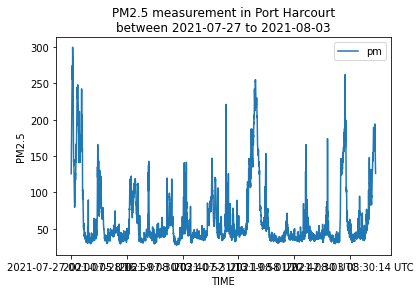

In [ ]:
df.plot(x="dt", y= 'pm')
plt.title("PM2.5 measurement in Port Harcourt\nbetween 2021-07-27 to 2021-08-03", size=12)
plt.xlabel('TIME', size=10)
plt.ylabel('PM2.5', size=10)

## Look at stationarity
Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
*  It should have constant mean.
*  It should have constant variance or standard deviation.
*  Auto-covariance (used to estimate. the dominant periods in the time series) should not depend on time.

If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

##### Dickey-Fuller test is statistical tests for checking stationarity, while Rolling Statistics is more of a visual technique. In rolling statistics we plot the mean and standard deviation of the time series and see if it varies with time. Dickey-Fuller test comprise of a Test Statistic and some Critical Values for different confidence levels(1%, 5%, 10%). We visualize the results and if the ‘Test Statistic’ is less than the ‘Critical Value’, we can infer that the series is stationary.
**ADF statistic > critical value:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. **ADF statistic < critical value:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

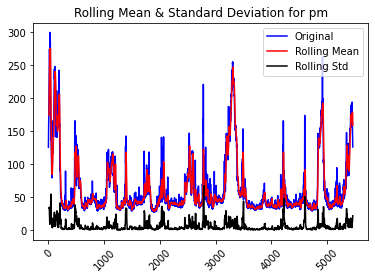

In [ ]:
# Determining rolling statistics
rolmean = df['pm'].rolling(window = 12, center = False).mean()
rolstd = df['pm'].rolling(window = 12, center = False).std()

# Plot rolling statistics:
orig = plt.plot(df['pm'],
                    color = 'blue', 
                    label = 'Original')
mean = plt.plot(rolmean,
                    color = 'red', 
                    label = 'Rolling Mean')
std = plt.plot(rolstd,
                   color = 'black', 
                   label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for %s' %('pm'))
plt.xticks(rotation = 45)
plt.show(block = False)
plt.close()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
X = df["pm"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Results of Dickey-Fuller Test:
ADF Statistic: -5.899379
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


Here different percentages represents various confidence levels. We generally consider results of 1% confidence interval as it will tell us whether the TS is stationary with 99% confidence.

## Correcting for stationarity

It is common for time series data to have to correct for non-stationarity. 



**What happens if you do not correct for these things?**

- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  
 


## Ways to correct for trend and seasonality, to make the time series stationary.
The three common methods to achieve stationarity are:

*   **Transformation** *Examples.* Log, square root, etc.
*   **Smoothing** *Examples.* Weekly average, monthly average, rolling averages.
*   **Differencing** *Examples.* First-order differencing, Second-order differencing

#### And then you are ready to fit the data with a **MODEL** (maybe a statistical model like the ARIMA model or a neural network like the Recurrent neural network's LSTM )

## Transformation, Smoothing, and Differencing
**Looking at our data:**
- Applying log transformation, weekly moving average smoothing, and differencing made the data more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [ ]:
def plot_transformed_data(df, ts, ts_transform):
  """
  Plot transformed and original time series data
  """
  # Plot time series data
  f, ax = plt.subplots(1,1)
  ax.plot(df[ts])
  ax.plot(df[ts_transform], color = 'red')

  # Add title
  ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

  # Rotate x-labels
  ax.tick_params(axis = 'x', rotation = 45)

  # Add legend
  ax.legend([ts, ts_transform])
  
  plt.show()
  plt.close()
  
  return

/usr/local/lib/python2.7/dist-packages/pandas/core/algorithms.py:1547: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ts,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
ds,,,,,,,,,
2010-07-03,2.0,0.693147,0.297063,1.428571,0.693147,0.571429,0.396084,0.693147,0.000000
2010-07-04,1.0,0.000000,0.198042,1.285714,-0.693147,-0.285714,-0.198042,0.329429,-0.329429
2010-07-05,3.0,1.098612,0.255966,1.428571,1.098612,1.571429,0.842647,0.611588,0.487024
2010-07-06,1.0,0.000000,0.255966,1.428571,-1.098612,-0.428571,-0.255966,0.435290,-0.435290
2010-07-16,2.0,0.693147,0.709973,2.142857,0.000000,-0.142857,-0.016826,0.497544,0.195603


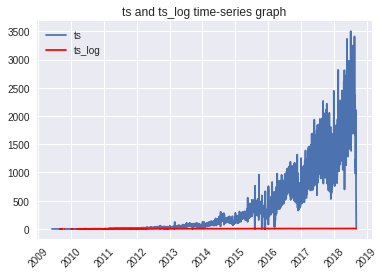

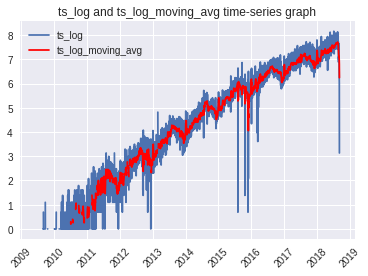

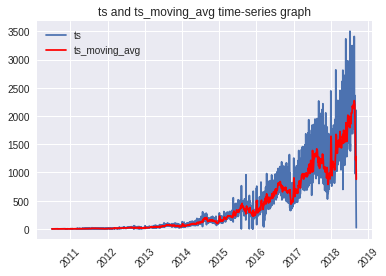

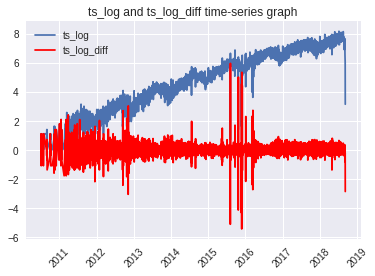

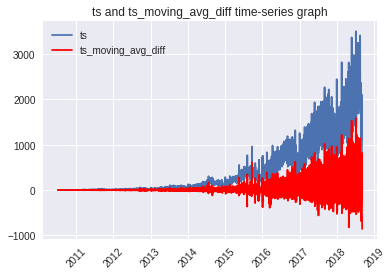

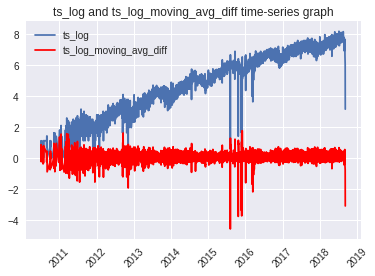

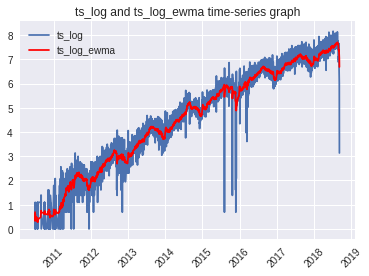

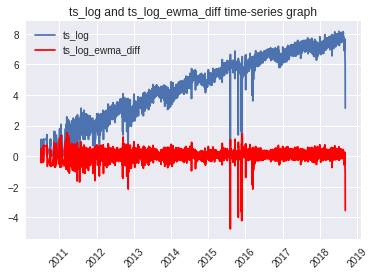

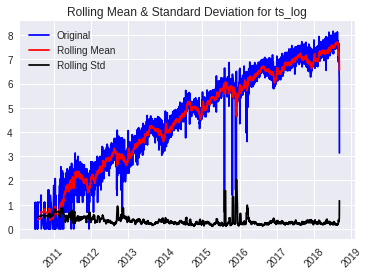

Results of Dickey-Fuller Test:
Test Statistic                   -2.260516
p-value                           0.185019
# Lags Used                      22.000000
Number of Observations Used    2720.000000
Critical Value (5%)              -2.862603
Critical Value (1%)              -3.432756
Critical Value (10%)             -2.567336
dtype: float64


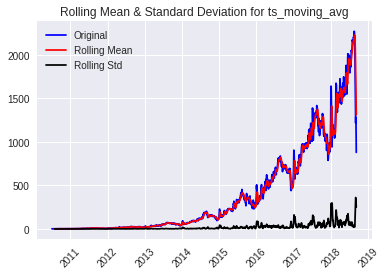

Results of Dickey-Fuller Test:
Test Statistic                   -1.207469
p-value                           0.670375
# Lags Used                      28.000000
Number of Observations Used    2714.000000
Critical Value (5%)              -2.862606
Critical Value (1%)              -3.432762
Critical Value (10%)             -2.567337
dtype: float64


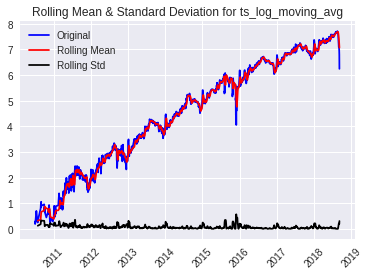

Results of Dickey-Fuller Test:
Test Statistic                   -2.278058
p-value                           0.179142
# Lags Used                      28.000000
Number of Observations Used    2714.000000
Critical Value (5%)              -2.862606
Critical Value (1%)              -3.432762
Critical Value (10%)             -2.567337
dtype: float64


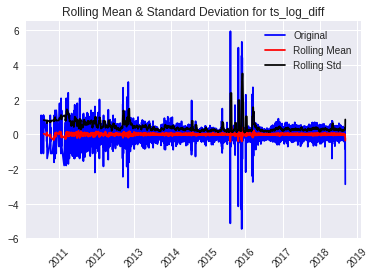

Results of Dickey-Fuller Test:
Test Statistic                -1.283012e+01
p-value                        5.898053e-24
# Lags Used                    2.100000e+01
Number of Observations Used    2.721000e+03
Critical Value (5%)           -2.862603e+00
Critical Value (1%)           -3.432756e+00
Critical Value (10%)          -2.567336e+00
dtype: float64


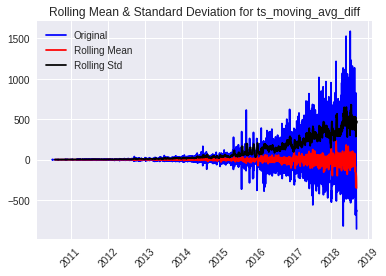

Results of Dickey-Fuller Test:
Test Statistic                   -4.974821
p-value                           0.000025
# Lags Used                      28.000000
Number of Observations Used    2714.000000
Critical Value (5%)              -2.862606
Critical Value (1%)              -3.432762
Critical Value (10%)             -2.567337
dtype: float64


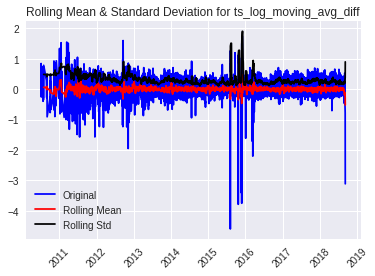

Results of Dickey-Fuller Test:
Test Statistic                -1.292892e+01
p-value                        3.736404e-24
# Lags Used                    2.200000e+01
Number of Observations Used    2.720000e+03
Critical Value (5%)           -2.862603e+00
Critical Value (1%)           -3.432756e+00
Critical Value (10%)          -2.567336e+00
dtype: float64


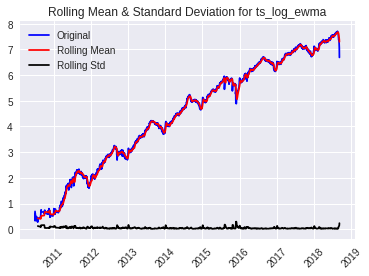

Results of Dickey-Fuller Test:
Test Statistic                   -2.296185
p-value                           0.173201
# Lags Used                      23.000000
Number of Observations Used    2719.000000
Critical Value (5%)              -2.862604
Critical Value (1%)              -3.432757
Critical Value (10%)             -2.567336
dtype: float64


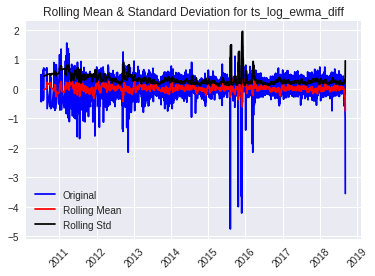

Results of Dickey-Fuller Test:
Test Statistic                -9.066491e+00
p-value                        4.418323e-15
# Lags Used                    2.200000e+01
Number of Observations Used    2.720000e+03
Critical Value (5%)           -2.862603e+00
Critical Value (1%)           -3.432756e+00
Critical Value (10%)          -2.567336e+00
dtype: float64


In [ ]:
# Transformation - log ts
df_example['ts_log'] = df_example['ts'].apply(lambda x: np.log(x))

# Transformation - 7-day moving averages of log ts
df_example['ts_log_moving_avg'] = df_example['ts_log'].rolling(window = 7,
                                                               center = False).mean()

# Transformation - 7-day moving average ts
df_example['ts_moving_avg'] = df_example['ts'].rolling(window = 7,
                                                       center = False).mean()

# Transformation - Difference between logged ts and first-order difference logged ts
# df_example['ts_log_diff'] = df_example['ts_log'] - df_example['ts_log'].shift()
df_example['ts_log_diff'] = df_example['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
df_example['ts_moving_avg_diff'] = df_example['ts'] - df_example['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df_example['ts_log_moving_avg_diff'] = df_example['ts_log'] - df_example['ts_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df_example_transform = df_example.dropna()

# Transformation - Logged exponentially weighted moving averages (EWMA) ts
df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife = 7,
                                                                         ignore_na = False,
                                                                         min_periods = 0,
                                                                         adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log'] - df_example_transform['ts_log_ewma']

# Display data
display(df_example_transform.head())

# Plot data
plot_transformed_data(df = df_example, 
                      ts = 'ts', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = df_example, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_log')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_moving_avg')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_log_moving_avg')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_log_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_log_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = df_example_transform, 
                  ts = 'ts_log_ewma')

# Perform stationarity test
test_stationarity(df = df_example_transform,
                  ts = 'ts_log_ewma_diff')

## Decomposition: trend, seasonality, residuals
**Looking at our data:**
- De-trending and de-seasonalizing made the data (i.e., the residuals) more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [ ]:
def plot_decomposition(df, ts, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(v

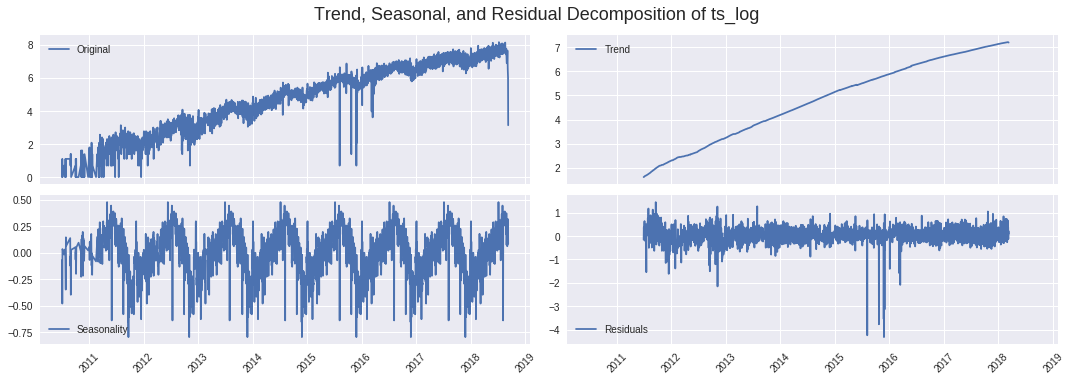

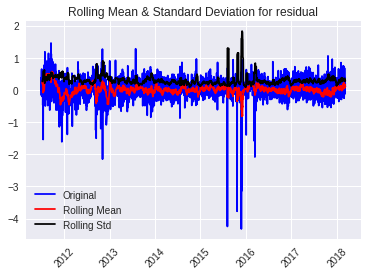

Results of Dickey-Fuller Test:
Test Statistic                -6.243743e+00
p-value                        4.629649e-08
# Lags Used                    2.700000e+01
Number of Observations Used    2.351000e+03
Critical Value (5%)           -2.862770e+00
Critical Value (1%)           -3.433135e+00
Critical Value (10%)          -2.567425e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_example_transform['ts_log'], freq = 365)

df_example_transform.loc[:,'trend'] = decomposition.trend
df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
df_example_transform.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_transform, 
                   ts = 'ts_log', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = df_example_transform.dropna(), ts = 'residual')

# Let us model some time-series data! Finally! ARIMA models.

We will be doing an example here! We can use ARIMA models when we know there is dependence between values and we can leverage that information to forecast.

**ARIMA = Auto-Regressive Integrated Moving Average**.   
**Assumptions.** The time-series is stationary.  
**Depends on:**  
  **1. Number of AR (Auto-Regressive) terms (p).**  
  **2. Number of I (Integrated or Difference) terms (d).**  
  **3. Number of MA (Moving Average) terms (q).**  

## ACF and PACF Plots
**How do we determine p, d, and q?**
For p and q, we can use ACF and PACF plots (below).

**Autocorrelation Function (ACF).** Correlation between the time series with a lagged version of itself (e.g., correlation of Y(t) with Y(t-1)).

**Partial Autocorrelation Function (PACF).** Additional correlation explained by each successive lagged term.

**How do we interpret ACF and PACF plots?**
- p – Lag value where the PACF chart crosses the upper confidence interval for the first time.
- q – Lag value where the ACF chart crosses the upper confidence interval for the first time.


In [ ]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

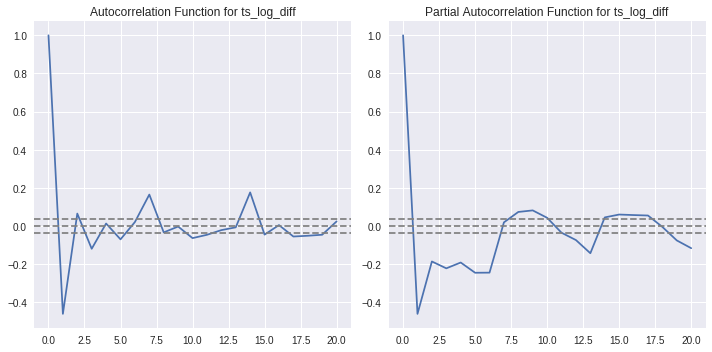

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

# determine ACF and PACF
lag_acf = acf(np.array(df_example_transform['ts_log_diff']), nlags = 20)
lag_pacf = pacf(np.array(df_example_transform['ts_log_diff']), nlags = 20)

# plot ACF and PACF
plot_acf_pacf(df = df_example_transform, ts = 'ts_log_diff')

In [ ]:
def run_arima_model(df, ts, p, d, q):
  """
  Run ARIMA model
  """
  from statsmodels.tsa.arima_model import ARIMA

  # fit ARIMA model on time series
  model = ARIMA(df[ts], order=(p, d, q))  
  results_ = model.fit(disp=-1)  
  
  # get lengths correct to calculate RSS
  len_results = len(results_.fittedvalues)
  ts_modified = df[ts][-len_results:]
  
  # calculate root mean square error (RMSE) and residual sum of squares (RSS)
  rss = sum((results_.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))
  
  # plot fit
  plt.plot(df[ts])
  plt.plot(results_.fittedvalues, color = 'red')
  plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
  
  plt.show()
  plt.close()
  
  return results_

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


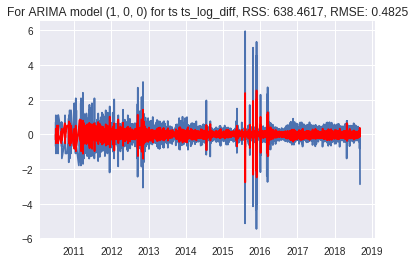

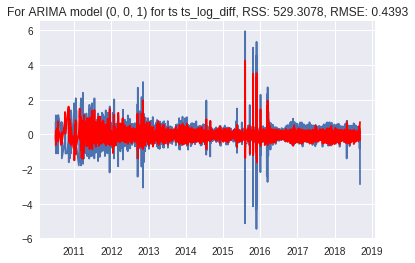

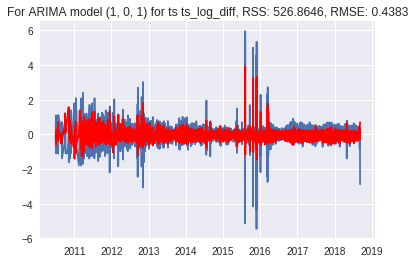

In [ ]:
# Note: I do the differencing in the transformation of the data 'ts_log_diff'
# AR model with 1st order differencing - ARIMA (1,0,0)
model_AR = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# MA model with 1st order differencing - ARIMA (0,0,1)
model_MA = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 0, 
                           d = 0, 
                           q = 1)

# ARMA model with 1st order differencing - ARIMA (1,0,1)
model_MA = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 1, 
                           d = 0, 
                           q = 1)

# Let us model some time-series data! Finally! Facebook Prophet package.

We will be doing an example here! Installing the necessary packages might take a couple of minutes.  In the meantime, I can talk a bit about [Facebook Prophet](https://facebook.github.io/prophet/), a tool that allows folks to forecast using additive or component models relatively easily.  It can also include things like:
* Day of week effects
* Day of year effects
* Holiday effects
* Trend trajectory
* Can do MCMC sampling

In [ ]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

    100% |████████████████████████████████| 50.0MB 471kB/s 
    100% |████████████████████████████████| 2.0MB 11.3MB/s 
  Running setup.py bdist_wheel for fbprophet ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/f5/21/b3/127d7d3dd12f8311da7d5af1944976f53e121ce88899697c6f
Successfully built fbprophet


In [ ]:
def days_between(d1, d2):
    """Calculate the number of days between two dates.  D1 is start date (inclusive) and d2 is end date (inclusive)"""
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

In [ ]:
# Inputs for query

date_column = 'dt'
metric_column = 'ts'
table = df_example
start_training_date = '2010-07-03'
end_training_date = '2018-09-08'
start_forecasting_date = '2018-09-09'
end_forecasting_date = '2018-12-31'
year_to_estimate = '2018'

# Inputs for forecasting

# future_num_points
# If doing different time intervals, change future_num_points
future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None # 2e6

# growth: default = 'linear'
# Can also choose 'logistic'
growth = 'linear'

# n_changepoints: default = 25, uniformly placed in first 80% of time series
n_changepoints = 25 

# changepoint_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoint_prior_scale = 0.05 

# changpoints: example = ['2016-01-01']
changepoints = None 

# holidays_prior_scale: default = 10
# If you find that the holidays are overfitting, you can adjust their prior scale to smooth them
holidays_prior_scale = 10 

# interval_width: default = 0.8
interval_width = 0.8 

# mcmc_samples: default = 0
# By default Prophet will only return uncertainty in the trend and observation noise.
# To get uncertainty in seasonality, you must do full Bayesian sampling. 
# Replaces typical MAP estimation with MCMC sampling, and takes MUCH LONGER - e.g., 10 minutes instead of 10 seconds.
# If you do full sampling, then you will see the uncertainty in seasonal components when you plot:
mcmc_samples = 0

# holiday: default = None
# thanksgiving = pd.DataFrame({
#   'holiday': 'thanksgiving',
#   'ds': pd.to_datetime(['2014-11-27', '2015-11-26',
#                         '2016-11-24', '2017-11-23']),
#   'lower_window': 0,
#   'upper_window': 4,
# })
# christmas = pd.DataFrame({
#   'holiday': 'christmas',
#   'ds': pd.to_datetime(['2014-12-25', '2015-12-25', 
#                         '2016-12-25','2017-12-25']),
#   'lower_window': -1,
#   'upper_window': 0,
# })
# holidays = pd.concat((thanksgiving,christmas))
holidays = None

daily_seasonality = True

In [ ]:
# get relevant data - note: could also try this with ts_log_diff
df_prophet = df_example_transform[['ts']] # can try with ts_log_diff

# reset index
df_prophet = df_prophet.reset_index()

# rename columns
df_prophet = df_prophet.rename(columns = {'ds': 'ds', 'ts': 'y'}) # can try with ts_log_diff

# Change 'ds' type from datetime to date (necessary for FB Prophet)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Change 'y' type to numeric (necessary for FB Prophet)
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='ignore')

# Remove any outliers
# df.loc[(df_['ds'] > '2016-12-13') & (df_['ds'] < '2016-12-19'), 'y'] = None

In [ ]:
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True):
  """
  Create forecast
  """
  
  # Create copy of dataframe
  df_ = df.copy()

  # Add in growth parameter, which can change over time
  #     df_['cap'] = max(df_['y']) if cap is None else cap

  # Create model object and fit to dataframe
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)

  # Fit model with dataframe
  m.fit(df_)

  # Create dataframe for predictions
  future = m.make_future_dataframe(periods = future_num_points)
  #     future['cap'] = max(df_['y']) if cap is None else cap

  # Create predictions
  fcst = m.predict(future)

  # Plot
  m.plot(fcst);
  m.plot_components(fcst)

  return fcst

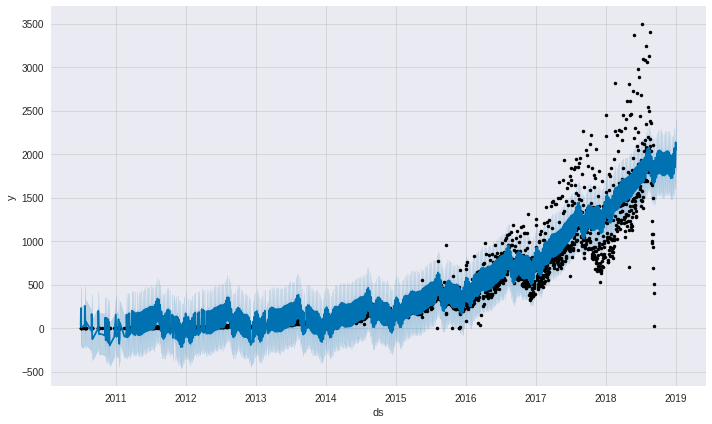

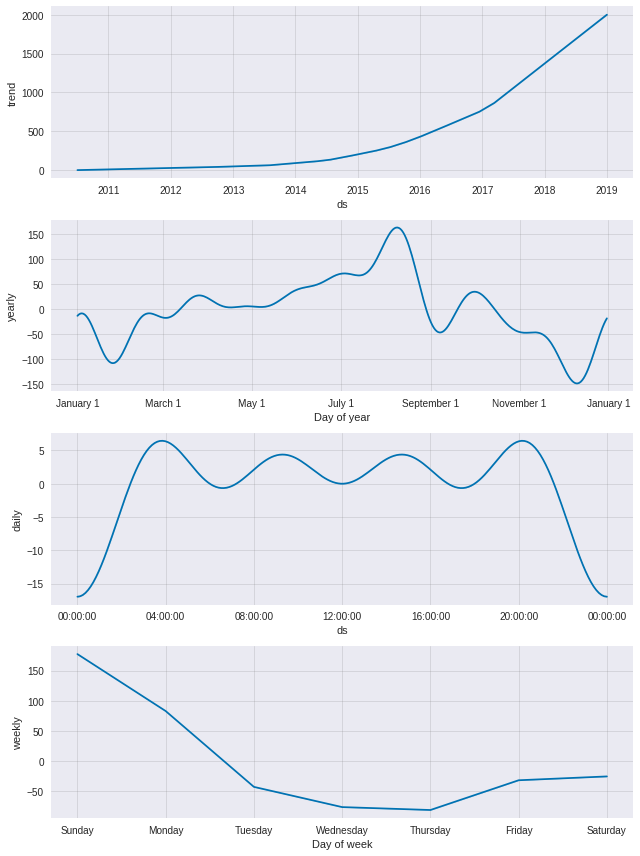

In [ ]:
fcst = create_daily_forecast(df_prophet,
#                              cap,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality)

In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [ ]:
print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])

MAPE: 489.853947
MPE: 61.942978
MAE: 11526.827186
RMSE: 189.137808


# Let us model some time-series data! Finally! LSTM for regression

We will be going through an example here.

Also, here are some resources on recurrent neural networks (RNN) and Long Short-Term Memory networks (LSTMs):
* [Link 1](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
* [Link 2](https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f)
* [Link 3](http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/)

In [ ]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 1
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 1, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  
  return

Epoch 1/5
 - 4s - loss: 8.1068e-04
Epoch 2/5
 - 3s - loss: 4.2630e-04
Epoch 3/5
 - 3s - loss: 4.2030e-04
Epoch 4/5
 - 3s - loss: 4.2552e-04
Epoch 5/5
 - 3s - loss: 4.1484e-04
Train Score: 81.10 RMSE
Test Score: 380.51 RMSE


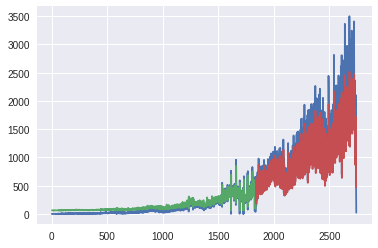

Epoch 1/5
 - 4s - loss: 8.2000e-04
Epoch 2/5
 - 3s - loss: 3.4724e-04
Epoch 3/5
 - 3s - loss: 3.4314e-04
Epoch 4/5
 - 3s - loss: 3.3064e-04
Epoch 5/5
 - 3s - loss: 3.3535e-04
Train Score: 63.32 RMSE
Test Score: 396.01 RMSE


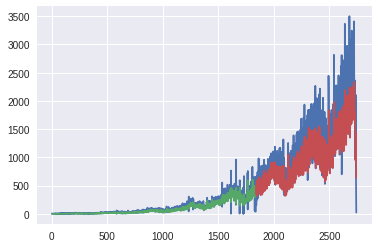

Epoch 1/5
 - 5s - loss: 5.2419e-04
Epoch 2/5
 - 4s - loss: 3.4261e-04
Epoch 3/5
 - 4s - loss: 3.3890e-04
Epoch 4/5
 - 4s - loss: 3.2987e-04
Epoch 5/5
 - 4s - loss: 3.3415e-04
Train Score: 65.41 RMSE
Test Score: 429.30 RMSE


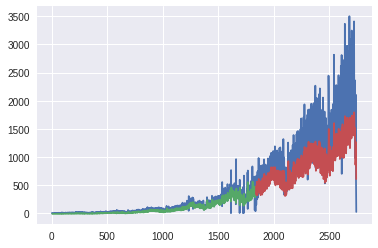

In [ ]:
# LSTM Network for Regression
do_lstm_model(df = df_prophet, 
              ts = 'y', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = df_prophet, 
              ts = 'y', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = df_prophet, 
              ts = 'y', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# # LSTM with Memory Between Batches
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'memory between batches')

# # Stacked LSTMs with Memory Between Batches
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'stacked with memory between batches')